<font color='red'>**Report Submission Information (must be completed before submitting report!)**</font>
* Student 1 Full Name and Number : Yue Chang 872301
* Student 2 Full Name and Number : Qiushu Chen 894461
* Workshop day : Wednesday
* Workshop time : 6pm

# <font color='blue'> Workshop 4 – Reinforcement Learning (ML) [2 weeks] </font>

## Objectives:

* Gain hands-on experience with reinforcement learning.
* Familiarise yourself with some of the modern approaches practical methods used for deep reinforcement learning.
* Solve basic reinforcement learning problems using Python and Keras.
* Connect theoretical knowledge and practical usage by doing it yourself.

> __Common objectives of all workshops:__
> Gain hands-on experience and learn by doing! Understand how theoretical knowledge discussed in lectures relates to practice. Develop motivation for gaining further theoretical and practical knowledge beyond the subject material.

## Overview:

**Reinforcement Learning (RL)** has been making headlines the last few years and there are good reasons for it! Extensions of the methods you will see in this workshop have been used to make computers learn [how to play Atari games by themselves](https://openai.com/blog/openai-baselines-dqn/) [(see also this)](https://deepmind.com/research/publications/playing-atari-deep-reinforcement-learning/). The recent advances in [solving most challenging board games](https://deepmind.com/research/alphago/) have been very impressive. Until even ten years ago, many people believed that computers would never learn how to play the game "Go" due to its combinatorial complexity. Today, AlphaGo variants are the first computer program to defeat a professional human Go player, the first program to defeat a Go world champion, and arguably the strongest Go player in history. It is a testament to the power of RL that [AlphaGo Zero](https://deepmind.com/blog/alphago-zero-learning-scratch/) learns to play simply by playing games against itself, starting from completely random play. 

The theoretical foundations of RL have been known for a long while as presented in lectures. Today's successes basically come from well-engineered or designed software that runs on powerful computing systems. Multiple heuristic algorithms and designs verified through extensive experimentation seem to be the key methodology. Despite introducing state-of-the-art concepts, tools, and implementations, this workshop provides only a initial starting point to the world of modern RL.

> Learning more on RL requires good coding skills and a powerful computer (often with a good CUDA-supporting graphic card) or a cloud computing account with one of the major providers. Computer and board games have been the natural playground of modern RL. However, [applications of RL to engineering disciplines](https://blog.insightdatascience.com/using-reinforcement-learning-to-design-a-better-rocket-engine-4dfd1770497a) remains an under-explored and very exciting domain!

## Workshop Preparation: [before you arrive to the lab]

You can come to the workshops as you are or you can prepare beforehand to learn much more! 
We will give you a lot of time to finish the tasks but those are the bare minimums. Just like in the lectures, the topics we cover in the workshops are quite deep and we can only do so much in two hours. There is much more to learn and coming prepared to the workshop is one of the best ways to gain more knowledge! For example, there are a few questions in each workshop which you can answer beforehand.

> __Self-learning__ is one of the most important skills that you should acquire as a student. Today, self-learning is much easier than it used to be thanks to a plethora of online resources.
For this workshop, start by exploring the resource mentioned in the preparation steps below.

### Workshop Preparation Steps:

1. Common step for all workshops: read the Workshop Manual (Jupyter Notebook) beforehand!
2. Review relevant lecture slides on machine learning.
3. Read/check relevant reading material and links from LMS/Resources-Reading
4. Check the embedded links below hints and background.
5. _\[optional\]_ _You can start with workshop tasks and questions_

### Additional packages to install

In this workshop, we will use the [Openai gym](http://gym.openai.com) package for convenience. You can [install a minimum version](https://github.com/openai/gym#installation) simply by using

```pip install gym``` 

from within the Anaconda environment. This minimal install is sufficient for our purposes. 

(You may or may not need to install [_Build Tools for Visual Studio 2019 (right click to download install instructions)_](./files/Windows_build_tools_install_2019.pdf) if you are using Windows 10.)

_Ask for help from your demonstrator in case you need it._


## Tasks and Questions:

Follow the procedures described below, perform the given tasks and answer the workshop questions __on the Python notebook itself!__ The marks associated with each question are clearly stated. Keep your answers to the point and complete to get full marks! Ensure that your code is clean and appropriately commented. 

__The resulting notebook will be your Workshop Report!__

> __The goal is to learn__, NOT blindly follow the procedures in the fastest possible way! __Do not simply copy-paste answers (from Internet, friends, etc.). You can and should use all available resources but only to develop your own understanding. If you copy-paste, you will pay the price in the final exam!__

## Section 1. Multi-armed Bandits

<img align="center" src="img/Las_Vegas_slot_machines.jpg" width="500" hspace="20"/>  

In a **k-armed (multi-armed) bandit** problem, a decision making agent repeatedly chooses one of $k$ different actions. Each action can be interpreted as pulling one of the k-levers. After each choice, the agent receives a reward obtained from a probability distribution that depends on the selected action. The objective is to maximise the expected total reward over a time horizon, for example, over 1000 action selections, or time steps. Multi-armed bandits have [a variety of important applications](https://medium.com/@CornellResearch/whats-behind-your-navigation-app-79d2754e6878) ranging from clinical trials and routing (including navigation) to recommender systems. 

As a special case of _reinforcement learning_, the [multi-armed bandit](https://en.wikipedia.org/wiki/Multi-armed_bandit) problem has actually only a single state. The agent still has to learn the environment represented by the underlying probability distributions and rewards. The problem provides a nice introduction to _reinforcement learning_ and an opportunity to explore the fundamental **exploration versus exploitation** trade-offs involved.

_Hint: Example implementations online (randomly selected, not guaranteed to be correct):_
* https://www.analyticsvidhya.com/blog/2018/09/reinforcement-multi-armed-bandit-scratch-python/
* https://peterroelants.github.io/posts/multi-armed-bandit-implementation/
* https://lilianweng.github.io/lil-log/2018/01/23/the-multi-armed-bandit-problem-and-its-solutions.html
* https://towardsdatascience.com/comparing-multi-armed-bandit-algorithms-on-marketing-use-cases-8de62a851831

In [2]:
# %matplotlib notebook
import pandas as pd
import numpy as np
import time
import random
import matplotlib.pyplot as plt
import matplotlib
import keras.models 
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import gym

Using TensorFlow backend.


### 10-armed bandit data set

Let's first (create or) _load_ a random 10-armed data set that approximately matches the description in Section 2.3 of [Sutton and Barto RL book.](http://incompleteideas.net/book/the-book-2nd.html) 

In [2]:
def gen_data(num_bandits=10, T=2000, filename='10armdata'):
    ## function generates a synthetic data set with given parameters 
    ## and saves the result to files folder under the given name
    
    # init data array
    tenarm_data = np.zeros((T,num_bandits))

    # random mean awards
    mean_rewards = np.random.normal(size=num_bandits)
    #print(mean_rewards)
    #print(np.random.normal(0,1,num_bandits))
    for t in range(T):
        tenarm_data[t,:]=np.random.normal(mean_rewards,1,num_bandits)
        
    np.save('./files/'+filename, tenarm_data)


#gen_data()
#tenarm_data.shape
#tenarm_data[0:10,:]

# use generated data
tenarm_datal = np.load('./files/10armdata.npy')
tenarm_datal.shape
# print(tenarm_datal)

(2000, 10)

### Multi-armed Bandit Algorithms

We now implement a simple random strategy for selecting actions. The results are also random as expected. This can be considered as pure **exploration** since the algorithm keeps randomly choosing actions. However, note that we do not make proper use of the randomly collected observations yet.

-396.64032940409953


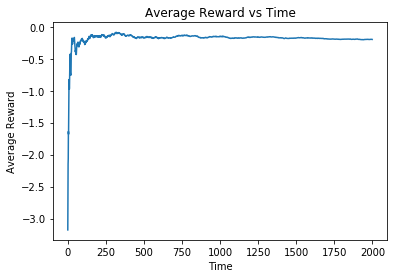

In [3]:
def bandit_random(data=tenarm_datal):
    # random selection bandit algorithm
    
    num_bandits = tenarm_datal.shape[1]
    T = tenarm_datal.shape[0]
    # init storage arrays
    selections = np.zeros(T) # sequence of lever selections
    step_rewards = np.zeros(T) # sequence of step selections
    cum_rewards = np.zeros(T) # sequence of cumulative rewards
    # main loop
    for t in range(T):
        sel = random.randrange(num_bandits)
        selections[t] = sel
        step_rewards[t] = data[t,sel]
        if t>0:
            cum_rewards[t] = step_rewards[t]+cum_rewards[t-1]
        else:
            cum_rewards[t] = step_rewards[t]
            
    avg_reward = np.divide(cum_rewards[1:T],np.arange(1,T)) # average reward over steps
    
    return (selections, step_rewards, cum_rewards, avg_reward)
    


(selections, step_rewards, cum_rewards, avg_reward) = bandit_random()

print(cum_rewards[-1])  # total reward
plt.figure()
plt.title('Average Reward vs Time')
plt.xlabel('Time')
plt.ylabel('Average Reward')
plt.plot(avg_reward)
plt.show()

Let us consider next a more meaningful strategy, known as **$\varepsilon$-greedy algorithm**. The idea is to explore with a pre-determined fixed probability $\varepsilon<1$ and exploit, i.e. get the maximum reward given current knowledge, with probability $1-\varepsilon$. The observations are now used to estimate the values of actions by averaging. This well-known algorithm is discussed in Section 2.7 of [Sutton and Barto book](http://incompleteideas.net/book/the-book-2nd.html) and described below:

<img align="center" src="img/eps-bandit.png" width="800" hspace="20"/>  

We provide a rudimentary implementation below as a single run.

1732.7767821064674


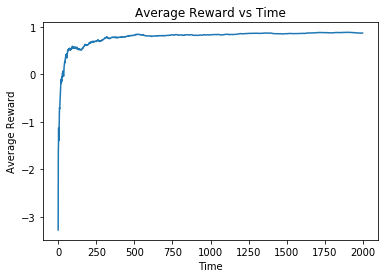

In [4]:
def bandit_epsgreedy(data=tenarm_datal, eps=0.1):
    # epsilon-greedy bandit algorithm
    
    # parameters
    num_bandits = data.shape[1]
    T = data.shape[0]
    
    # init storage arrays
    Q = np.zeros(num_bandits)
    N = np.zeros(num_bandits)
    selections = np.zeros(T) # sequence of lever selections
    step_rewards = np.zeros(T) # sequence of step selections
    cum_rewards = np.zeros(T) # sequence of cumulative rewards
    # main loop
    for t in range(T):
        
        # pull lever
        if np.random.rand() < eps:
            # make a random selection
            sel = random.randrange(num_bandits)
        else:
            # choose the best expected reward
            sel = np.argmax(Q)
            
        # update nbr of selections made
        N[sel] = N[sel] + 1 
        # update mean reward estimate
        Q[sel] = Q[sel] + (1/N[sel])*(data[t,sel]- Q[sel])
        
        # store values
        selections[t] = sel
        step_rewards[t] = data[t,sel]
        if t>0:
            cum_rewards[t] = step_rewards[t]+cum_rewards[t-1]
        else:
            cum_rewards[t] = step_rewards[t]
            
    avg_reward = np.divide(cum_rewards[1:T],np.arange(1,T)) # average reward over steps
    
    return (selections, step_rewards, cum_rewards, avg_reward)


(selections, step_rewards, cum_rewards, avg_reward) = bandit_epsgreedy(eps=0.15)

print(cum_rewards[-1])  # total reward
plt.figure()
plt.title('Average Reward vs Time')
plt.xlabel('Time')
plt.ylabel('Average Reward')
plt.plot(avg_reward)
plt.show()

Next, we run the algorithm over multiple simulations, which we generate by permutating the input data. The obtained average results are naturally less "noisy". *It may take many simulations to get low-variance, averaged results, especially if the bandits are truly random. Here we use a static dataset so we get good averages with a small number of runs.*

In [5]:
def bandit_epsgreedy_sims(datasim=tenarm_datal, epsilon=0.1, nbr_sims=10):
    # parameters
    num_bandits = datasim.shape[1]
    T = datasim.shape[0]
    
    # store values
    sim_cum_rewards = np.zeros((nbr_sims,T))
    sim_mean_rewards = np.zeros((nbr_sims,T-1))
    
    for s in range(nbr_sims):
        (dummy,dummy, cum_rewards, avg_reward) = bandit_epsgreedy(data=np.random.permutation(datasim),
                                                                    eps=epsilon)
        sim_cum_rewards[s,:] = cum_rewards
        sim_mean_rewards[s,:] = avg_reward
    
    return (sim_cum_rewards, sim_mean_rewards)


(sim_cum_rewards, sim_mean_rewards) = bandit_epsgreedy_sims(epsilon=0.15, nbr_sims=10)
print('Expected total reward (over sims) = ', np.average(sim_cum_rewards[:,-1]))

Expected total reward (over sims) =  1657.8925732168366


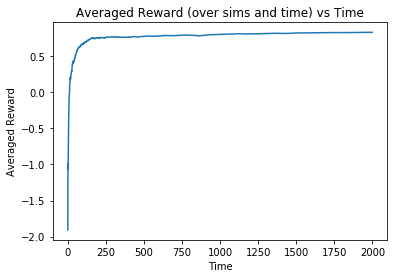

In [6]:
sim_avg_rewards = np.average(sim_mean_rewards, axis=0)
sim_avg_rewards.shape
plt.figure()
plt.title('Averaged Reward (over sims and time) vs Time')
plt.xlabel('Time')
plt.ylabel('Averaged Reward')
plt.plot(sim_avg_rewards)
plt.show()

### Exploration vs Exploitation Trade-off

It is important to investigate the relationship between the outcome (average cumulative reward over time) and $\varepsilon$ parameter. For small $\varepsilon$, the algorithm is more greedy and chooses the best action (given knowledge level, here Q estimate) most of the time. This is called **exploitation** in [reinforcement learning (RL)](https://en.wikipedia.org/wiki/Reinforcement_learning). For large $\varepsilon$, the algorithm spends more time in **exploration** mode and obtains better Q estimates. This **exploration vs exploitation** trade-off is [fundamental to all RL approaches](https://www.coursera.org/lecture/practical-rl/exploration-vs-exploitation-3ExUr), not just multi-armed bandits. The same concepts are also relevant to [dual control](https://en.wikipedia.org/wiki/Dual_control_theory) as well as [adaptive control](https://en.wikipedia.org/wiki/Adaptive_control). 

### Question 1 (20 pts) A Multi-armed bandit for CDN Optimisation

In this question, the problem of real-world data retrieval from multiple redundant sources is investigated. This communication network problem is commonly known as the Content Distribution Network (CDN) problem [(see a relevant paper, right click to download)](./files/performance_of_CDN.pdf). An agent must retrieve data through a network with several redundant sources available. For each retrieval, the agent selects one source and waits until the data is retrieved. The objective of the agent is to minimize the sum of the delays for the successive retrievals. This problem is investigated in Section 4.2 of [this paper, (right click to download)](./files/bandit.pdf) and related [project](http://bandit.sourceforge.net/) as well as discussed in this [practical book](http://shop.oreilly.com/product/0636920027393.do).

We will use a subset of the [publicly available](./files/license.txt) universities web latency networking data set from the [bandit project](http://bandit.sourceforge.net/), which contains retrieval delay/latency measurements from over 700 universities' homepages in milliseconds. Let's decrease the number of bandits (columns) randomly to 20 to make it computationally less time consuming (but you can change this later if you wish). The rewards are the negatives of the delays.

In [7]:
univ_data = pd.read_csv('./files/univ-latencies.csv')
univ_data = -univ_data.sample(n=20, axis=1) #choose 20 columns randomly for computational simplicity
univ_data.head()
print(univ_data.values)
print(univ_data.values.shape)

[[ -441  -399  -314 ... -1907  -114  -396]
 [ -412  -305  -279 ... -1436  -121  -271]
 [ -502  -302  -290 ... -1853  -241  -271]
 ...
 [ -540  -540  -286 ...  -707  -110  -263]
 [ -388  -324  -436 ...  -701  -109  -266]
 [ -391  -330  -287 ...  -715  -109  -265]]
(1361, 20)


_Answer the following by implementing and simulating well-known multi-armed bandit algorithms._

1. (8 pts) Apply $\varepsilon$-greedy algorithm to the CDN problem, i.e. universities web latency data set using negative of latencies as rewards. Try different $\varepsilon$ values to investigate exploration vs exploitation trade-off and the best total average reward.
2. (12 pts) Implement and apply _upper confidence bound_ (UCB) action selection algorithm to the same data set. Compare your results and briefly discuss your findings.

**Answer as text here**
1. From the $\varepsilon$-greedy algorithm we choose different $\varepsilon$ to see the expected total rewards. And we see that when $\varepsilon$ is too small like when $\varepsilon = 0$ we are purely using the greedy method, so it will easily get stuck in the local optimal, when we increase the $\varepsilon$ we are also exploring new solutions to improve estimates, but we are not maximizing the rewards. So we need to choose $\varepsilon$ carefully, because $\varepsilon$ is indicates explore new solutions or stick to the current optimal solution, purely exploring is not efficient, while pure greedy the solution may be a local optimal instead of a global one. From our result we can also see that neither $\varepsilon = 0$(pure greedy) or $\varepsilon = 1$(pure exploring) are not the one with best rewards. So the trade-off has to make to choose $\varepsilon$ via experiments and study of the data structure. And from our experiment, the best total rewards is eps = 0.01 Expected total reward (over 100 sims) =  -197222.79.
2. We implement the UCB by changing the action selection criterion. Firstly, we observed that UCB has a overall better expected total rewards than the $\varepsilon$-greedy algorithm, because for $\varepsilon$-greedy algorithm, when exploring, the action is choose pure randomly, while for UCB method, all actions are choosen based on previous experience. So the UCB is a more efficient method then $\varepsilon$-greedy algorithm. Secondly, we see that when we vary the c value, we can see the same effect of trade-off in exploitation and exploration. When c=0, we are being greedy and select the current optimal bandit, and when c=infinity, we are purely exploring which is not efficient and have bad performance because it is not maximizing the rewards. And we know that the trade-off in exploitation and exploration is very important in reinforcement learning problem.

eps = 0.00
Expected total reward (over sims) =  -201686.65
eps = 0.01
Expected total reward (over sims) =  -197222.79
eps = 0.05
Expected total reward (over sims) =  -241751.73
eps = 0.10
Expected total reward (over sims) =  -261680.4
eps = 0.20
Expected total reward (over sims) =  -335873.51
eps = 0.50
Expected total reward (over sims) =  -525672.55
eps = 1.00
Expected total reward (over sims) =  -821328.33


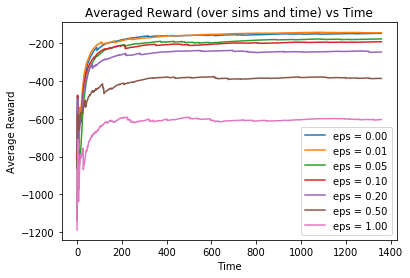

In [11]:
epsilon_list = [0,0.01,0.05,0.1,0.2,0.5,1]
plt.figure()
plt.title('Averaged Reward (over sims and time) vs Time')
plt.xlabel('Time')
plt.ylabel('Average Reward')

for eps in epsilon_list:    
    (sim_cum_rewards, sim_mean_rewards) = bandit_epsgreedy_sims(datasim=univ_data.values,epsilon=eps, nbr_sims=100)
    print('eps = %.2f'%(eps))
    print('Expected total reward (over sims) = ', np.average(sim_cum_rewards[:,-1]))
    sim_avg_rewards = np.average(sim_mean_rewards, axis=0)
    sim_avg_rewards.shape
    plt.plot(sim_avg_rewards,label='eps = %0.2f'%(eps))

# plt.plot(sim_avg_rewards)
plt.legend(loc='best')
plt.show()

In [12]:
import math
def bandit_UCB(data=tenarm_datal, c=0.1):
    # UCB bandit algorithm
    
    # parameters
    num_bandits = data.shape[1]
    T = data.shape[0]
    
    # init storage arrays
    Q = np.zeros(num_bandits)
    N = np.zeros(num_bandits)
    selections = np.zeros(T) # sequence of lever selections
    step_rewards = np.zeros(T) # sequence of step selections
    cum_rewards = np.zeros(T) # sequence of cumulative rewards

    for t in range(T):
        
#         sel = np.argmax(Q+np.sqrt(2*np.log(t)/N))
        sel = np.argmax(Q + c*np.sqrt(np.log(t)/N))
        # update nbr of selections made
        N[sel] = N[sel] + 1 
        # update mean reward estimate
        Q[sel] = Q[sel] + (1/N[sel])*(data[t,sel]- Q[sel])
        
        # store values
        selections[t] = sel
        step_rewards[t] = data[t,sel]
        if t > 0:
            cum_rewards[t] = step_rewards[t]+cum_rewards[t-1]
        else:
            cum_rewards[t] = step_rewards[t]

    avg_reward = np.divide(cum_rewards[1:T],np.arange(1,T)) # average reward over steps
    
    return (selections, step_rewards, cum_rewards, avg_reward)


def bandit_UCB_sims(datasim=tenarm_datal, cc=1, nbr_sims=10):
    # parameters
    num_bandits = datasim.shape[1]
    T = datasim.shape[0]
    
    # store values
    sim_cum_rewards = np.zeros((nbr_sims,T))
    sim_mean_rewards = np.zeros((nbr_sims,T-1))
    
    for s in range(nbr_sims):
        (dummy,dummy, cum_rewards, avg_reward) = bandit_UCB(data=np.random.permutation(datasim),
                                                                    c=cc)
        sim_cum_rewards[s,:] = cum_rewards
        sim_mean_rewards[s,:] = avg_reward
    
    return (sim_cum_rewards, sim_mean_rewards)

C:\Users\Yue\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
C:\Users\Yue\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Yue\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Yue\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Yue\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in multiply


c = 0.00
Expected total reward (over sims) =  -189120.45
c = 1.00
Expected total reward (over sims) =  -211394.36
c = 10.00
Expected total reward (over sims) =  -195581.18
c = 100.00
Expected total reward (over sims) =  -228477.51
c = 1000.00
Expected total reward (over sims) =  -444414.0
c = 999999.00
Expected total reward (over sims) =  -817140.06


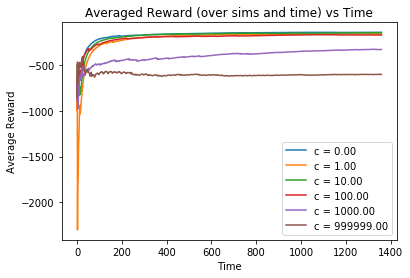

In [10]:
c_list = [0,1,10,100,1000,999999]
plt.figure()
plt.title('Averaged Reward (over sims and time) vs Time')
plt.xlabel('Time')
plt.ylabel('Average Reward')

for c in c_list:    
    (sim_cum_rewards, sim_mean_rewards) = bandit_UCB_sims(datasim=univ_data.values,cc=c, nbr_sims=100)
    print('c = %.2f'%(c))
    print('Expected total reward (over sims) = ', np.average(sim_cum_rewards[:,-1]))
    sim_avg_rewards = np.average(sim_mean_rewards, axis=0)
    sim_avg_rewards.shape
    plt.plot(sim_avg_rewards,label='c = %0.2f'%(c))

# plt.plot(sim_avg_rewards)
plt.legend(loc='best')
plt.show()

## Section 2. Model-free Reinforcement Learning with CartPole

In this section, we are going to use  a simple (v1) [cart-pole environment](http://gym.openai.com/envs/CartPole-v1/) from [openai gym](https://gym.openai.com/). In this classic control problem, a pole or [inverted pendulum](https://en.wikipedia.org/wiki/Inverted_pendulum) is attached vertically to a cart, which moves along a frictionless track. The system is controlled by applying a horizontal force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every time step that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

Note that, there are detailed models of the cartpole environment, [see for example this](https://danielpiedrahita.wordpress.com/portfolio/cart-pole-control/), which can be used to develop a variety of model-based solutions. However, we will use this simple environment to illustrate a _model-free,_ purely data-oriented modern **reinforcement learning** approach as discussed in the lectures.

First, let's have a look at the environment by taking random actions. When you run the cell below, you should see a new window with the cartpole environment for a short duration.

In [4]:
env = gym.make('CartPole-v1')
env.reset()
for _ in range(100):
    env.render()
    env.step(env.action_space.sample()) # take a random action
time.sleep(2) # wait for 2 seconds
env.close()

### Environment

The figure below left depicts the standard **SARSA** (_State-Action-Reward-State'-Action'_) paradigm. As discussed during lectures, the idea is for the _agent_ to learn the environment and achieve the objective concurrently by taking a mixture of random actions and actions that maximise the cumulative reward. 

The figure below right represents an [implementation within the openai gym environment.](http://gym.openai.com/docs/#observations) In this implementation, _observation_ corresponds to state. 

<img align="left" src="img/sarsa.png" width="500" hspace="20"/>  <img align="center" src="img/openai_env.png" width="300" hspace="20"/>  

The environment is described in detail in the classic publication cited below [(right click to download)](./files/Barto1983.pdf). Note that this predates deep learning so it has more historical value than practical value, other than the model itself.

AG Barto, RS Sutton and CW Anderson, "Neuronlike Adaptive Elements That Can Solve Difficult Learning Control Problem", IEEE Transactions on Systems, Man, and Cybernetics, 1983.

The states and actions are described within the [source code of the environment.](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py)

Actions are $\{0,\, 1\}$, corresponding to "Push cart to the left" and "Push cart to the right", respectively.

In [5]:
env = gym.make('CartPole-v0')
print(env.action_space)
env.action_space.n

Discrete(2)


2

In [6]:
print(env.observation_space)

Box(4,)


The states are \[Cart Position, Cart Velocity, Pole Angle, Pole Velocity At Tip\]. The angle is zero when to pole is pointing up. 

In [7]:
env = gym.make('CartPole-v1')
observation = env.reset()
print(np.array([env.reset()]))

[[ 0.0174798  -0.00016674  0.03892242  0.01872086]]


In [8]:
env = gym.make('CartPole-v1')
for episode in range(10):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample() # take a random action
        observation, reward, done, info = env.step(action) # episode ends when done=True based on conditions
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

[-0.03504356  0.03071823 -0.00303634 -0.00454384]
[-0.0344292  -0.16436004 -0.00312722  0.28717954]
[-0.0377164  -0.35943726  0.00261637  0.57887453]
[-0.04490514 -0.16435207  0.01419386  0.28701696]
[-0.04819218  0.03056462  0.0199342  -0.00115576]
[-0.04758089  0.22539509  0.01991109 -0.28748314]
[-0.04307299  0.42022752  0.01416143 -0.57382038]
[-0.03466844  0.22490992  0.00268502 -0.27671003]
[-0.03017024  0.02974976 -0.00284918  0.01681854]
[-0.02957524  0.22491246 -0.00251281 -0.27676198]
[-0.025077    0.02982644 -0.00804805  0.01512735]
[-0.02448047 -0.16517917 -0.00774551  0.3052602 ]
[-0.02778405  0.0300523  -0.0016403   0.01014462]
[-0.027183   -0.16504609 -0.00143741  0.30230956]
[-0.03048393  0.03009632  0.00460878  0.00917366]
[-0.029882    0.22515187  0.00479226 -0.28205159]
[-0.02537896  0.02996189 -0.00084878  0.01213894]
[-0.02477972 -0.16514788 -0.000606    0.30455394]
[-0.02808268  0.02998271  0.00548508  0.01167996]
[-0.02748303 -0.16521748  0.00571868  0.30608844]


[ 0.16384589  0.59590177 -0.16421886 -1.04130604]
[ 0.17576393  0.7927788  -0.18504498 -1.38071214]
Episode finished after 37 timesteps
[ 0.03435789 -0.01256408 -0.02692405  0.00916958]
[ 0.03410661  0.18293344 -0.02674066 -0.29188515]
[ 0.03776528 -0.01179723 -0.03257837 -0.00775439]
[ 0.03752933  0.18377643 -0.03273345 -0.31053555]
[ 0.04120486 -0.01086424 -0.03894416 -0.02835287]
[ 0.04098758 -0.20540669 -0.03951122  0.25179285]
[ 0.03687944 -0.00974346 -0.03447536 -0.0530862 ]
[ 0.03668457  0.18585543 -0.03553709 -0.35644394]
[ 0.04040168  0.38146413 -0.04266597 -0.66011745]
[ 0.04803097  0.18696109 -0.05586832 -0.38116839]
[ 0.05177019 -0.00732488 -0.06349168 -0.10661087]
[ 0.05162369 -0.20148222 -0.0656239   0.16538431]
[ 0.04759405 -0.00548525 -0.06231622 -0.14725791]
[ 0.04748434  0.19047117 -0.06526137 -0.45893112]
[ 0.05129376 -0.00367048 -0.07444    -0.1875118 ]
[ 0.05122035  0.19243319 -0.07819023 -0.50271783]
[ 0.05506902  0.38856512 -0.08824459 -0.81898137]
[ 0.06284032  

### DQN Agent

We now create a DQN agent class, which implements the behaviour of the agent based on the [famous paper (right click to download)](./files/dqn.pdf). This implementation is based on Algorithm 1 (Deep Q-learning with Experience Replay) on page 5.  

* _Mnih, Volodymyr, Koray Kavukcuoglu, David Silver, Alex Graves, Ioannis Antonoglou, Daan Wierstra, and Martin Riedmiller. "Playing atari with deep reinforcement learning." arXiv preprint arXiv:1312.5602 (2013)._


In [92]:
class CartPoleDQN:
    def __init__(self, environment):
        
        # from cartpole environment
        self.env = environment
        self.nbr_states = self.env.observation_space.shape[0]
        self.nbr_actions = self.env.action_space.n
        
        # to store (state,action,reward)
        self.memory = deque(maxlen=1000000)
        self.scores=[]
        
        # parameters
        self.gamma = 0.95    # discount rate
        self.epsilon = 1    # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995 
        self.batch_size = 16
        
        # build the DNN model
        self.build_model()
        
        
    def build_model(self):
        """ Define Keras DNN model """

        self.model = Sequential()
              
        self.model.add(Dense(16, input_shape=(self.nbr_states,), activation='relu'))
        self.model.add(Dense(4, activation='relu'))     
        self.model.add(Dense(self.nbr_actions, activation='linear'))
        
        self.model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
        
    
    def save_model(self, filename):
        
        self.model.save(filename+".h5")
        
        
    def load_model(self, filename):
        
        self.model = keras.models.load_model(filename)
        
    def remember(self, state, action, reward, next_state, done):
        # store the SARSA from observation
        self.memory.append((state, action, reward, next_state, done))
        
    
    def act(self, state):
        
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = self.model.predict(state)[0]
            return np.argmax(q_values)
        
    
    def update_model(self):
        
        if len(self.memory) < self.batch_size:
            return
        
        # sample the mini-batch
        mini_batch=random.sample(self.memory, self.batch_size)
        
        # experience replay
        for state, action, reward, state_next, done in mini_batch:
            if done:
                q_update = reward
            else:
                q_update = reward + self.gamma*np.amax(self.model.predict(state_next)[0])
            q = self.model.predict(state)
            q[0][action] = q_update
            self.model.fit(state, q, batch_size=self.batch_size, verbose=0)

        
        # update exploration/exploitation balance
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        else:
            self.epsilon=self.epsilon_min

### Experiments and Training - Agent in Environment

The interaction of the agent with the environment is simulated below. Each **episode** ends when control fails, [defined as](https://gym.openai.com/envs/CartPole-v1/) the pole being more than 15 degrees from vertical, or the cart moving more than 2.4 units from the centre. 

A **reward** of $+1$ is given for every time step that the pole remains uprigh, so the **score** per episode is the number of steps where the control is successful.

In [93]:
env=gym.make('CartPole-v1')
dqn_agent = CartPoleDQN(environment=env)
for episode in range(50):
    state = env.reset()
    state = np.reshape(state, [1, dqn_agent.nbr_states]) # reshape for keras
    score = 0
    done = False
    while not done:
        #env.render()
        action = dqn_agent.act(state)
        state_next, reward, done, info = env.step(action)        
        state_next = np.reshape(state_next, [1, dqn_agent.nbr_states]) # reshape for keras
        
        if done:
            reward = 0  # no reward for last time step
        score = score + reward
        
        dqn_agent.remember(state, action, reward, state_next, done)
        state = state_next
        
        dqn_agent.update_model()
        
        if done:
            dqn_agent.scores.append(score)
            print("Episode:", episode, "  Score:", score, "  memory length:",
                      len(dqn_agent.memory), "  epsilon:", dqn_agent.epsilon)
            break

env.close()
print("training completed!")

Instructions for updating:
Colocations handled automatically by placer.
Episode: 0   Score: 13.0   memory length: 14   epsilon: 1
Instructions for updating:
Use tf.cast instead.
Episode: 1   Score: 23.0   memory length: 38   epsilon: 0.8911090557802088
Episode: 2   Score: 17.0   memory length: 56   epsilon: 0.8142285204175609
Episode: 3   Score: 13.0   memory length: 70   epsilon: 0.7590483508202912
Episode: 4   Score: 10.0   memory length: 81   epsilon: 0.7183288830986236
Episode: 5   Score: 16.0   memory length: 98   epsilon: 0.6596532430440636
Episode: 6   Score: 13.0   memory length: 112   epsilon: 0.6149486215357263
Episode: 7   Score: 9.0   memory length: 122   epsilon: 0.5848838636585911
Episode: 8   Score: 17.0   memory length: 140   epsilon: 0.5344229416520513
Episode: 9   Score: 15.0   memory length: 156   epsilon: 0.4932355662165453
Episode: 10   Score: 13.0   memory length: 170   epsilon: 0.4598090507939749
Episode: 11   Score: 17.0   memory length: 188   epsilon: 0.4201389

### Performance Evaluation

The original **criterion for success** is [defined as](https://gym.openai.com/envs/CartPole-v1/) getting an average reward of greater or equal than 195.0 over 100 consecutive trials. We relax this in order to (literally) save time. Let's consider a more modest version with an _average reward >=100 over 20 consecutive trials._

In [26]:
np.average(dqn_agent.scores[30:50])

63.4

<IPython.core.display.Javascript object>


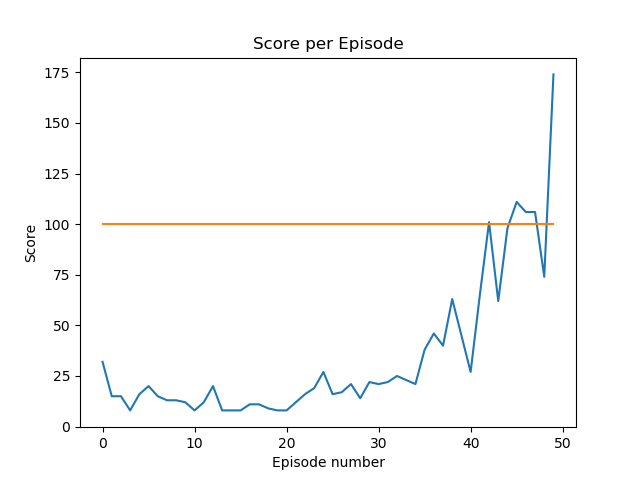

In [27]:
plt.figure()
plt.title('Score per Episode')
plt.xlabel('Episode number')
plt.ylabel('Score')
plt.plot(dqn_agent.scores)
plt.plot(np.ones((len(dqn_agent.scores),1))*100)
plt.show()

### Resulting DQN Model

We now look a bit closer to the DNN underlying the DQN model we have trained.

In [28]:
dqn_agent.model.summary()
print(dqn_agent.model.get_weights())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 10        
Total params: 158
Trainable params: 158
Non-trainable params: 0
_________________________________________________________________
[array([[-0.01382324,  0.1382576 , -1.2754178 ,  0.00768977,  0.40454674,
        -0.0893203 ,  0.90654594,  1.3282893 , -0.07635271,  0.29658103,
         1.8659034 ,  0.40383792,  0.31088674,  0.8070841 ,  0.31491172,
         0.5586666 ],
       [ 0.44175723, -0.43401372, -0.5161352 , -0.10416115,  0.27879176,
        -0.04044381, -0.66416025,  0.07145593,  0.32050723,  0.81162554,
         0.08276296,

In [21]:
## install pydot in your environment using Anaconda Navigator or you can skip this step 
## by commenting out the commands below!

## Plot model graph
#keras.utils.plot_model(dqn_agent.model, show_shapes=True, show_layer_names=True, to_file='model.png')
#from IPython.display import Image
#Image(retina=True, filename='model.png')

### Visual test

We save our trained model to a file for reuse, which makes a lot of sense given the time spent on training. Then, we illustrate the performance of the model visually. Note that because we have cut the training short to save time, the result is rather sub-optimal.

In [29]:
# we save the trained model 
dqn_agent.save_model('dqn_train2')

In [30]:
# A few episodes to watch the behaviour

env = gym.make('CartPole-v1')
dqn_agent_test = CartPoleDQN(environment=env)
dqn_agent_test.load_model('dqn_train2.h5')
dqn_agent_test.epsilon = 0 # no random movements

for episode in range(5):
    state = env.reset()
    state = np.reshape(state, [1, dqn_agent_test.nbr_states]) # reshape for keras
    for t in range(150): # increase to 200 to see termination
        env.render()
        action = dqn_agent_test.act(state)
        state_next, reward, done, info = env.step(action)  
        state = np.reshape(state_next, [1, dqn_agent_test.nbr_states]) # reshape for keras
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Episode finished after 138 timesteps
Episode finished after 144 timesteps


### Question 2 (20 pts)

This question aims to motivate you to fully understand and improve upon the example possibly **suboptimal** DQN implementation above. <br/>
_Hint: a good model is quite similar to what is provided so minor tweaking should work!_

1. How does this DQN differ from classical Q-learning (see e.g. Section 6.5 of Sutton and Barto RL book)? Clearly identify and discuss similarities as well as differences. In addition, briefly describe the relationship to value iteration and dynamic programming (via Bellman's equation).
2. Improve the performance of the DQN by changing the underlying DNN architecture, training method, and _epsilon_ parameter and its decay which controls the exploration vs exploitation trade-off. Interpret and discuss your findings, e.g. what works and does not work and why? 
3. _[Optional, no marks]_ Do you see a high-level similarity between epsilon parameter and diminishing step size in gradient optimisation algorithms? 
4. _[Optional, no marks]_ Try different DNN architectures as well as approaches, e.g. A3C or [beyond](https://towardsdatascience.com/advanced-reinforcement-learning-6d769f529eb3).

_Hint: example implementations from the Web (which may be incorrect):_

* https://towardsdatascience.com/cartpole-introduction-to-reinforcement-learning-ed0eb5b58288
* https://gym.openai.com/envs/CartPole-v0/
* https://github.com/rlcode/reinforcement-learning


**Answer as text here**
1. 
 - Similarities: (1) both are temperol difference method, which means update during each time step in episode instead update after the episode finished.(2) both are model free method, don't need to build a model to make predictions, get feedback directly from the environment.(3)both are off-policy method, evaluate or improve a policy different from that used to generate the data, the next a' is not chosen from policy.(4)both are valued based method which can be used on discrete action but not on continous action.
 - Differences: (1) for Q-learning, it uses q-table to stores q value for each state-action pair; for DQN it uses NN to store the q values for massive states.(2) DQN has experience replay, it has memory to store the experience, so it can random choose sample experience to learn, which can break the correlation between experiences and improve learning efficiency. (3) DQN also has iterative update which also means fixed q-targets, the two NN for estimate q and stored q have the same structure but different parameters, so that the q is only periodically updated, thereby reduce the correlations with the target.
 - In addition, in both Q-learning and DQN the optimal Q-function is found by using the bellman equation which is the sum over immediate reward of taking action a and the reward of discounted future reward of the resulting  next state of action a. Bellman equation using dynamic programming by break the problems into simpler sub-problems and by finding the solution iteratively (solving the sub-problems) we can find the optimal Q-function.

2. 

  For this question we try multiple parameters to see the performace

 - First we try to change epsilon we find that when we change the epsilon from 1 to smaller value like 0.8,0.7,0.6 we can see an improvement in the average score. However, when we change epsilon to 0.5, we don't get a better performance, because we need to find a balance in exploitation and exploration and eplison starting at 0.8 is better than starting at 1 or 0.5 in our case. So the balance between explore and greedy is very important. At beginning episodes, we need to explore more than being greedy, because the environment is new, we need to try actions more randomly to build good estimates. Later, when a good estimates is build, we need to be greedy to maximize the rewards.
 - Then we try to change the decay factor of epsilon, when we decrease it to 0.99, we see a better more stable performance than before, that is because previously when use decay = 0.995, we found that only the last few episodes have epsilon 0.01, we need to be more greedy in last few episodes, which means that we are not decreasing fast enough. However, we also have to be careful to not choose decay factor too small, because when it decay too fast if we couldn't get a good marks before epsilon converge, we are missing the optimal solution. 
 - Next thing we try is to change the learning rate of the adam optimizer, when we change it to 0.005, we can see an improvement, because like what we learned in optimisation, smaller learning rate means a lower chance of overstepping the optimal solution, so here a smaller learning rate works.
 - We also try to change the optimizer to RMSprop etc, and other loss functions. However we didn't see a significant improvement.
 - Then we try to increase the layers and nodes of the NN, we see a significant improvement because more nodes and layers in NN means the NN can do a better job to capture the features to control the car-pole, so it can control more precisely.

Although we can have a good performance in our model, but we can see that it doesn't have a stable average scores, because in this model only one NN is used. Further improvements can be use two NN, same structure but different parameters to reduce correlations.

After serveral tries, we choose the parameter we think it's the best and run the test, we can see it works.

 -Note: We change the printing part of our code to have a clearer view of the performance, so that it keeps track of the scores more than 100's episode and when >=20 episode (successful) it can break. 

Episode: 0   Score: 43.0   memory length: 44   epsilon: 0.03768102957797
score100_Number= 0
Episode: 1   Score: 8.0   memory length: 53   epsilon: 0.014598402905120607
score100_Number= 0
Episode: 2   Score: 10.0   memory length: 64   epsilon: 0.01
score100_Number= 0
Episode: 3   Score: 10.0   memory length: 75   epsilon: 0.01
score100_Number= 0
Episode: 4   Score: 8.0   memory length: 84   epsilon: 0.01
score100_Number= 0
Episode: 5   Score: 9.0   memory length: 94   epsilon: 0.01
score100_Number= 0
Episode: 6   Score: 7.0   memory length: 102   epsilon: 0.01
score100_Number= 0
Episode: 7   Score: 10.0   memory length: 113   epsilon: 0.01
score100_Number= 0
Episode: 8   Score: 9.0   memory length: 123   epsilon: 0.01
score100_Number= 0
Episode: 9   Score: 7.0   memory length: 131   epsilon: 0.01
score100_Number= 0
Episode: 10   Score: 13.0   memory length: 145   epsilon: 0.01
score100_Number= 0
Episode: 11   Score: 75.0   memory length: 221   epsilon: 0.01
score100_Number= 0
Episode: 1

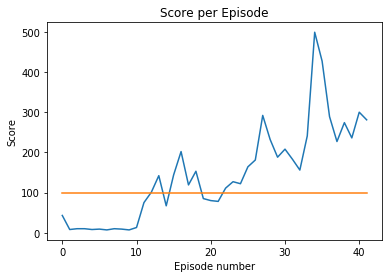

In [50]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt
import keras.models 
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop
import gym

env = gym.make('CartPole-v1')
env.reset()
for _ in range(100):
    env.render()
    env.step(env.action_space.sample()) # take a random action
    
time.sleep(2) # wait for 2 seconds
env.close()


class CartPoleDQN:
    def __init__(self, environment):
        
        # from cartpole environment
        self.env = environment
        self.nbr_states = self.env.observation_space.shape[0]
        self.nbr_actions = self.env.action_space.n
        
        # to store (state,action,reward)
        self.memory = deque(maxlen=1000000)
        self.scores=[]
        
        # parameters
        self.gamma = 0.95    # discount rate
        self.epsilon = 0.8    # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.9
        self.batch_size = 16
        
        # build the DNN model
        #self.build_model1()
#         self.build_model2()
        self.build_model3()
        
        
    def build_model1(self):
        """ Define Keras DNN model """

        self.model = Sequential()
              
        self.model.add(Dense(32, input_shape=(self.nbr_states,), activation='relu'))
        self.model.add(Dense(8, activation='relu'))     
        self.model.add(Dense(self.nbr_actions, activation='linear'))
        
        #self.model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
        self.model.compile(loss='mean_squared_error', optimizer=RMSprop(lr=0.001))
        #self.model.compile(loss='mae', optimizer=Adam(lr=0.001))

    def build_model2(self):
        """ Define Keras DNN model """

        self.model = Sequential()
              
        self.model.add(Dense(32, input_shape=(self.nbr_states,), activation='relu'))
        self.model.add(Dense(8, activation='relu'))     
        self.model.add(Dense(self.nbr_actions, activation='linear'))
        
        self.model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
        
    def build_model3(self):
        """ Define Keras DNN model """

        self.model = Sequential()
        
        self.model.add(Dense(64, input_shape=(self.nbr_states,), activation='relu'))
        self.model.add(Dense(32, activation='relu'))
        self.model.add(Dense(8, activation='relu'))     
        self.model.add(Dense(self.nbr_actions, activation='linear'))
        
        self.model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0005)) 
        
    
    def save_model(self, filename):
        
        self.model.save(filename+".h5")
        
        
    def load_model(self, filename):
        
        self.model = keras.models.load_model(filename)
        
    def remember(self, state, action, reward, next_state, done):
        # store the SARSA from observation
        self.memory.append((state, action, reward, next_state, done))
        
    
    def act(self, state):
        
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = self.model.predict(state)[0]
            return np.argmax(q_values)
        
    
    def update_model(self):
        
        if len(self.memory) < self.batch_size:
            return
        
        # sample the mini-batch
        mini_batch=random.sample(self.memory, self.batch_size)
        
        # experience replay
        for state, action, reward, state_next, done in mini_batch:
            if done:
                q_update = reward
            else:
                q_update = reward + self.gamma*np.amax(self.model.predict(state_next)[0])
            q = self.model.predict(state)
            q[0][action] = q_update
            self.model.fit(state, q, batch_size=self.batch_size, verbose=0)

        
        # update exploration/exploitation balance
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        else:
            self.epsilon=self.epsilon_min
            
env=gym.make('CartPole-v1')
dqn_agent = CartPoleDQN(environment=env)


#habit add
score100_Number = 0
for episode in range(50):
    state = env.reset()
    state = np.reshape(state, [1, dqn_agent.nbr_states]) # reshape for keras
    score = 0
    done = False
    
    while not done:
        #env.render()
        action = dqn_agent.act(state)
        state_next, reward, done, info = env.step(action)        
        state_next = np.reshape(state_next, [1, dqn_agent.nbr_states]) # reshape for keras
        
        if done:
            reward = 0  # no reward for last time step
        score = score + reward

        dqn_agent.remember(state, action, reward, state_next, done)
        state = state_next
        
        dqn_agent.update_model()
        
        if done:
            dqn_agent.scores.append(score)
            print("Episode:", episode, "  Score:", score, "  memory length:",
                      len(dqn_agent.memory), "  epsilon:", dqn_agent.epsilon)
            
            if score>100:
                #print("score>100:",score)
                score100_Number+=1
                print("score100_Number=",score100_Number)
            if score<=100:
                #print("score<=100:",score)
                score100_Number=0
                print("score100_Number=",score100_Number)
                
            if score100_Number>=20:
                print("Task can be stopped! (Score>100) number>20!")
                print("Episode:", episode, "  Score:", score, "  memory length:",
                      len(dqn_agent.memory), "  epsilon:", dqn_agent.epsilon)
                print("Average score is:",np.average(dqn_agent.scores[episode-20:episode]))
                
            break
        
    if score100_Number>=20:
        break;
                
env.close()
print("training completed!")

print("Average score between 30~50",np.average(dqn_agent.scores[30:50]))

plt.figure()
plt.title('Score per Episode')
plt.xlabel('Episode number')
plt.ylabel('Score')
plt.plot(dqn_agent.scores)
plt.plot(np.ones((len(dqn_agent.scores),1))*100)
plt.show()            

In [51]:
# we save the trained model 
dqn_agent.save_model('dqn_train2')
# A few episodes to watch the behaviour

env = gym.make('CartPole-v1')
dqn_agent_test = CartPoleDQN(environment=env)
dqn_agent_test.load_model('dqn_train2.h5')
dqn_agent_test.epsilon = 0 # no random movements

for episode in range(5):
    state = env.reset()
    state = np.reshape(state, [1, dqn_agent_test.nbr_states]) # reshape for keras
    for t in range(150): # increase to 200 to see termination
        env.render()
        action = dqn_agent_test.act(state)
        state_next, reward, done, info = env.step(action)  
        state = np.reshape(state_next, [1, dqn_agent_test.nbr_states]) # reshape for keras
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

# <font color='red'> Workshop Report Submission Instructions </font>

_You should ideally complete the workshop tasks and answer the questions within the respective session!_ The submission deadline is usually Friday, the week after. Submission deadlines will be announced on LMS.

It is **mandatory to follow all of the submissions guidelines** given below. _Don't forget the Report submission information on top of this notebook!_

1. The completed Jupyter notebook and its Pdf version (you can simply print-preview and then print as pdf from within your browser) should be uploaded to the right place in LMS by the announced deadline. _It is your responsibility to follow the announcements!_ **Late submissions will be penalised (up to 100% of the total mark depending on delay amount)!**
2. Filename should be "ELEN90088 Workshop **W:StudentID1-StudentID2** of session **Day-Time**", where __W__  refers to the workshop number, **StudentID1-StudentID2** are your student numbers, **Day-Time** is your session day and time, e.g. *Tue-14*.
3. Answers to questions, simulation results and diagrams should be included in the Jupyter notebook as text, code, plots. *If you don't know latex, you can write formulas/text to a paper by hand, scan it and then include as image within Markdown cells.*
4. One report submission per group. 

### Additional guidelines for your programs:

* Write modular code using functions. 
* Properly indent your code. But Python forces you do that anyway ;)
* Heavily comment the code to describe your implementation and to show your understanding. No comments, no credit!
* Make the code your own! It is encouraged to find and get inspired by online examples but you should exactly understand, modify as needed, and explain your code via comments. There will be no credit for blind copy/paste even if it somehow works (and it is easier to detect it than you might think)!